In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Theo Hernández,fr FRA,DF,Milan,it Serie A,25.0,1997.0,97.0,95.0,8415,93.5,0.17,0.31,0.15,0.29,0.13,0.28,0.11,0.26,272.0,141.0,52.0,118.0,43.0,68.72,2.58,16.66,33.33,19.91,2.24,68.68,2.91,1.51,1.26,39.18,278.91,174.26,4.00,2.88,0.76,1.74,0.75,43.07,5.08,3.040000,0.380000,1.86,0.49,0.15,0.18,0.31,1.86,0.29,0.02,0.02,0.03,0.01,0.01,4322.0,5383.0,80.0,69809.0,23453.0,2291.0,2557.0,90.0,1580.0,1904.0,83.0,336.0,593.0,57.0,0.00,0.15,0.14,-0.01,1.39,3.25,1.20,0.39,4.03,57.57,47.03,10.36,1.73,0.06,0.59,3.15,7.86,0.77,0.04,0.68,0.00,46.22,0.18,1.28,1.480000,0.400000,3.60,13.42,2.33,3.9,3.6,67.0,0.25,0.02,0.01,1.02,2.27,0.17,0.83,0.94,0.02,0.00,6.63,1.20,0.58,3,0,0,3,0,0
1,1,Marcel Sabitzer,at AUT,MF,RB Leipzig+RB Leipzig+Bayern Munich+Manchester...,de Bundesliga+eng Premier League+de Bundesliga,29.0,1994.0,80.0,46.0,53186,47.1,0.21,0.34,0.13,0.25,0.25,0.31,0.17,0.25,38.0,22.0,58.0,15.0,39.0,71.53,1.78,12.23,40.19,19.51,2.02,71.44,0.81,0.47,0.32,38.74,162.38,72.17,1.27,1.38,0.17,1.32,0.98,49.37,3.82,11.670000,1.170000,2.38,0.02,0.00,0.17,0.08,2.38,0.26,0.00,0.00,0.02,0.00,0.00,2306.0,2878.0,80.0,35602.0,10553.0,1258.0,1433.0,88.0,806.0,954.0,84.0,147.0,272.0,54.0,0.06,0.12,0.17,0.00,1.19,5.12,1.51,0.24,7.05,61.10,57.54,3.04,1.51,0.12,0.53,1.12,1.38,0.04,0.02,0.00,0.00,48.96,0.53,1.21,9.360000,2.940000,0.29,0.94,0.24,-1.5,-2.3,48.0,0.25,0.00,0.00,1.12,1.32,0.19,1.34,1.08,0.00,0.00,6.73,0.98,1.04,3,1,0,0,0,3
2,2,Dejan Kulusevski,se SWE,"MF,FW",Juventus+Tottenham+Juventus,it Serie A+eng Premier League+it Serie A,23.0,2000.0,103.0,61.0,1265762,67.0,0.18,0.49,0.18,0.49,0.15,0.36,0.15,0.36,260.0,138.0,53.0,114.0,44.0,46.15,0.64,6.18,17.72,23.27,5.04,46.15,3.88,2.06,1.70,29.58,207.92,110.02,3.97,2.09,1.76,3.33,2.06,

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW', 'FW,MF','MF,FW','MF'])]
newbie = newbie[newbie['Pos'].isin(['FW', 'FW,MF','MF,FW','MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW', 'FW,MF','MF,FW','MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW', 'FW,MF','MF,FW','MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW', 'FW,MF','MF,FW','MF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW', 'FW,MF','MF,FW','MF'])]
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)



In [6]:
Alvarez_2024=player_2024[player_2024['Player']=='Julián Álvarez']
Alvarez_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
24,88,Julián Álvarez,ar ARG,"MF,FW",Manchester City,eng Premier League,0.0,2000.0,36,31,2647,29.4,0.37,0.65,0.31,0.58,0.44,0.66,0.39,0.61,42.0,20.0,47.6,22.0,52.4,52.86,0.68,3.64,16.09,33.61,5.07,52.79,1.43,0.68,0.75,31.09,151.67,71.16,2.18,2.01,0.95,1.9,1.22,37.52,6.12,4.01,0.51,2.52,0.95,0.14,0.34,0.07,0.0,0.41,0.03,0.0,0.0,0.07,0.0,1011.0,1258.0,80.4,13977.0,2992.0,615.0,679.0,90.6,272.0,328.0,82.9,58.0,145.0,40.0,0.27,0.22,0.21,0.05,2.28,1.46,1.39,0.14,3.5,42.79,36.36,6.29,0.85,0.31,0.03,4.66,0.24,4.39,1.5,1.22,0.07,34.39,0.14,0.92,3.26,1.26,0.09,0.24,0.12,-2.0,-2.5,14.3,0.07,0.0,0.0,0.78,0.44,0.07,0.07,0.44,0.07,0.0,3.33,0.14,0.82,0.82,0.17,0.27,0.37,0.27,1.09,0.82,1.02,0.0,0.88,0.48,0.03,25.0


In [7]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
alvarez_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[24]],0)

# Print the percentile ranks for Declan Rice
print(alvarez_2024_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
24         81.0       88.0        78.0          85.0      89.0          92.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
24        89.0            92.0                57.0           58.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
24            59.0              64.0               74.0            62.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
24                    23.0                    22.0                    27.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
24                    97.0                    82.0                       62.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
24                       33.0                  35.0                     42.0   

    Carries_per_90  Total_Distance_per_90  \
24            60.0     

In [8]:
# Extract the percentile ranks, transpose, and sort them in descending order
alvarez_2024_percentile_ranks_sorted = alvarez_2024_percentile_ranks.T.sort_values(by=24, ascending=False)

# Get the top 20 parameters
top_30_params = alvarez_2024_percentile_ranks.index[:30]
top_30_params_values = alvarez_2024_percentile_ranks_sorted[24].head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index([24], dtype='int64')
Values:
Corner_Kicks_per_90           98.0
Touches_Att_3rd_per_90        97.0
Str_Corner_Kicks_per_90       97.0
In_Corner_Kicks_per_90        95.0
Dead_Ball_Passes_per_90       94.0
Shots_total_per90             93.0
Key_Passes_per_90             92.0
xG+xAG_per90                  92.0
npxG+xAG_per90                92.0
Out_Corner_Kicks_per_90       92.0
Pass_Dead_Shot_per_90         91.0
Passes_Short_Cmp              91.0
Shots_on_target_per90         91.0
Pass_Live_Goal_per_90         90.0
Passes_Short_Att              90.0
Penalty_Kicks_Won_per_90      90.0
Crosses_per_90                89.0
Assists_per_90                89.0
npxG_per90                    89.0
Fouls_Drawn_Goal_per_90       89.0
xG_per90                      89.0
G+A_per90                     88.0
xAG_per_90                    86.0
xA_per_90                     86.0
Passes_Short_Cmp%             85.0
G+A-PK_per90                  85.0
Shot-Shot_per_90              85.0
S

In [9]:
import pandas as pd




params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[24]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


    Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
24         81.0       88.0      89.0        89.0                        84.0   

    Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
24                     84.0                    97.0   

    Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
24                                66.0                         76.0   

    Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
24                        62.0                        79.0   

    Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
24                  80.0            89.0                57.0           58.0  


In [10]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[81.0,
 88.0,
 89.0,
 89.0,
 84.0,
 84.0,
 97.0,
 66.0,
 76.0,
 62.0,
 79.0,
 80.0,
 89.0,
 57.0,
 58.0]

In [11]:
image_path = "Alvarez.png"
fdj_cropped = Image.open(image_path)


In [12]:
split_params = [param.replace('_', '\n') for param in params]


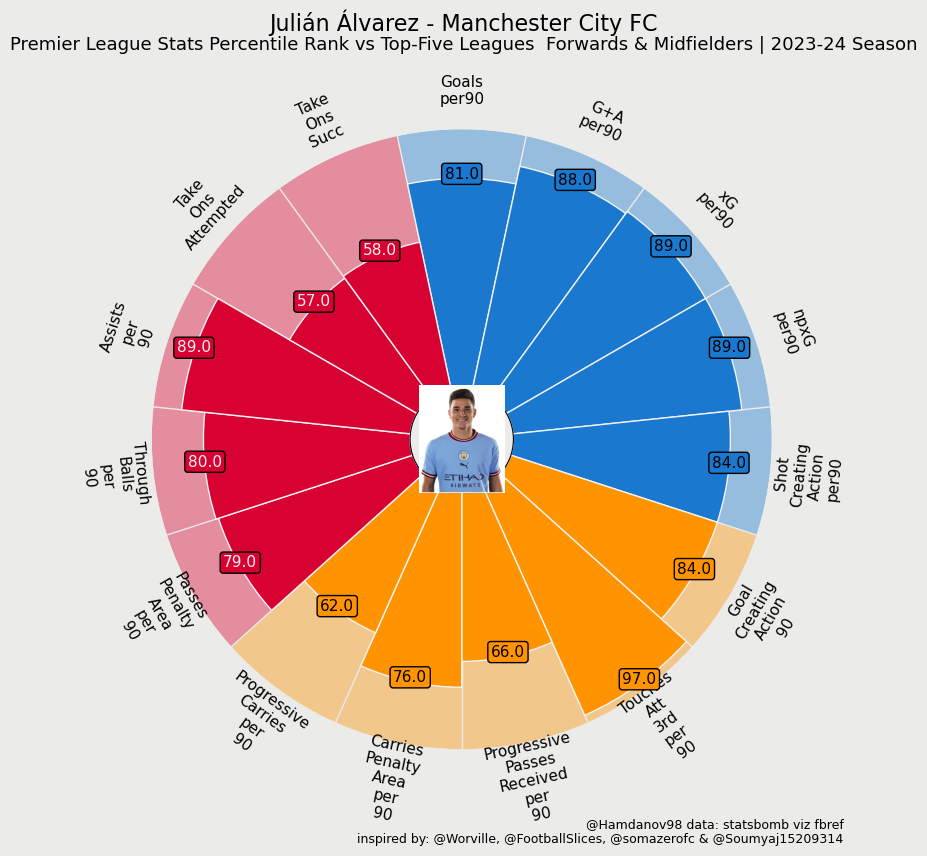

In [13]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Julián Álvarez - Manchester City FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues  Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Alvarez_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [14]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]

In [15]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [16]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [17]:
# Get de Ligt's row and compute cosine similarity
deligt_index = player_2024.index[player_2024['Player'] == 'Julián Álvarez'][0]
deligt_data = transformed_df.loc[deligt_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=deligt_index)

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, deligt_data).flatten()
transformed_df['similarity_to_alvarez_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_alvarez_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [19]:
# Visualize the results
player_2024['similarity_to_alvarez_2024'] = transformed_df['similarity_to_alvarez_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_alvarez_2024', ascending=False)
player_2024_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
599,2315,Mohamed Salah,eg EGY,FW,Liverpool,eng Premier League,0.0,1992.0,32,28,2534,28.2,0.64,0.99,0.46,0.82,0.75,1.17,0.55,0.97,77.0,27.0,35.1,49.0,63.6,48.19,0.14,1.67,16.31,30.71,8.55,47.94,2.73,0.96,1.74,34.65,188.26,92.70,3.48,1.91,2.34,-2.73,-2.09,39.57,12.09,4.94,0.71,3.65,0.07,0.25,0.74,0.18,0.04,0.50,0.00,0.07,0.11,0.04,0.00,737.0,1010.0,73.0,10826.0,3213.0,433.0,510.0,84.9,234.0,331.0,70.7,43.0,65.0,66.2,0.35,0.42,0.27,-0.06,2.34,1.99,2.41,0.21,5.21,35.82,34.33,0.99,0.14,0.64,0.11,1.45,0.71,0.00,0.00,0.00,0.00,26.13,0.50,1.49,3.80,1.67,0.12,0.28,0.15,-3.2,-2.5,30.0,-0.07,-0.00,-0.00,-0.43,0.92,0.60,0.07,0.39,0.04,-0.00,2.98,0.21,-0.50,0.60,0.04,0.28,0.28,0.21,0.74,0.53,0.67,0.04,0.67,0.04,0.00,28.6,0.936937
560,2193,Raphinha,br BRA,"FW,MF",Barcelona,es La Liga,0.0,1996.0,28,17,1368,15.2,0.39,0.99,0.33,0.92,0.48,0.86,0.43,0.81,46.0,24.0,52.2,19.0,41.3,58.82,0.72,5.26,22.24,31.84,5.33,58.75,3.03,1.58,1.25,32.57,189.74,93.29,3.22,1.45,1.51,-2.70,-0.53,40.79,10.79,5.86,0.86,3.09,1.32,0.39,0.53,0.46,0.07,0.59,0.20,0.00,0.07,0.00,0.00,522.0,693.0,75.3,8785.0,2397.0,261.0,313.0,83.4,182.0,222.0,82.0,63.0,114.0,55.3,0.59,0.38,0.33,0.22,2.70,2.57,2.11,0.53,3.75,45.59,39.47,5.79,1.18,0.39,0.72,5.39,1.25,3.29,1.32,1.25,0.00,34.34,0.33,1.05,3.82,1.32,0.09,0.25,0.12,-1.4,-1.6,64.3,-0.26,-0.07,-0.00,-1.12,1.64,0.46,0.86,0.53,0.07,-0.00,4.87,0.59,-0.33,0.92,0.39,0.39,0.13,0.26,1.18,0.92,1.12,0.07,1.78,0.72,0.00,22.2,0.934619
356,1383,Andrej Kramarić,hr CRO,"MF,FW",Hoffenheim,de Bundesliga,0.0,1991.0,30,2

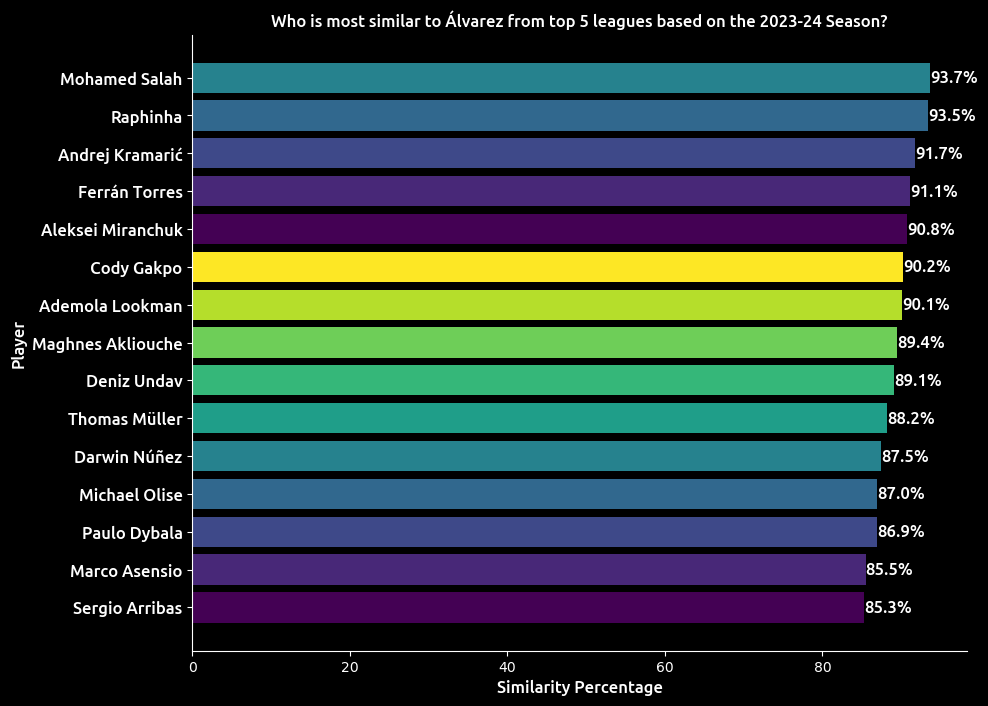

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_alvarez_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_alvarez_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Álvarez from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [21]:
Muller=player_2024[player_2024['Player']=='Thomas Müller']
Muller

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
474,1829,Thomas Müller,de GER,"MF,FW",Bayern Munich,de Bundesliga,0.0,1989.0,31,20,1654,18.4,0.27,0.76,0.27,0.76,0.31,0.77,0.31,0.77,21.0,11.0,52.4,8.0,38.1,52.23,0.49,3.53,19.35,29.73,6.14,52.23,1.14,0.6,0.43,28.75,133.37,75.22,2.07,1.96,0.49,-1.47,-1.25,41.36,10.22,5.22,0.76,4.4,0.0,0.05,0.38,0.27,0.11,0.65,0.0,0.0,0.0,0.05,0.05,602.0,810.0,74.3,9003.0,2348.0,339.0,402.0,84.3,211.0,287.0,73.5,33.0,67.0,49.3,0.49,0.46,0.43,0.03,2.77,2.83,2.34,0.54,4.46,44.02,41.68,2.23,0.16,0.38,0.11,2.99,1.85,0.0,0.0,0.0,0.0,32.72,0.11,1.36,1.96,0.6,0.14,0.45,0.17,-0.7,-0.7,54.5,-0.0,-0.0,-0.0,-0.65,1.14,0.82,0.16,0.87,0.05,-0.05,2.99,1.63,-1.36,1.41,0.27,0.54,0.6,0.71,1.9,1.2,1.2,0.0,1.58,0.33,0.0,37.1,0.881969


In [22]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
muller_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[474]],0)

# Print the percentile ranks for Declan Rice
print(muller_2024_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
474         69.0       93.0        73.0          95.0      76.0          97.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
474        80.0            97.0                20.0           28.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
474            75.0              19.0               25.0            60.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
474                    13.0                    20.0                    39.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
474                    94.0                    93.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
474                       60.0                       22.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
474                  30.0                     19.0            51.0   

     Tota

In [23]:
import pandas as pd




params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[474]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


     Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
474         69.0       93.0      76.0        80.0                        96.0   

     Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
474                     97.0                    94.0   

     Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
474                                95.0                         52.0   

     Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
474                        59.0                        97.0   

     Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
474                  87.0           100.0                20.0           28.0  


In [24]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[69.0,
 93.0,
 76.0,
 80.0,
 96.0,
 97.0,
 94.0,
 95.0,
 52.0,
 59.0,
 97.0,
 87.0,
 100.0,
 20.0,
 28.0]

In [25]:
image_path = "Muller.jpg"
fdj_cropped = Image.open(image_path)


In [26]:
split_params = [param.replace('_', '\n') for param in params]


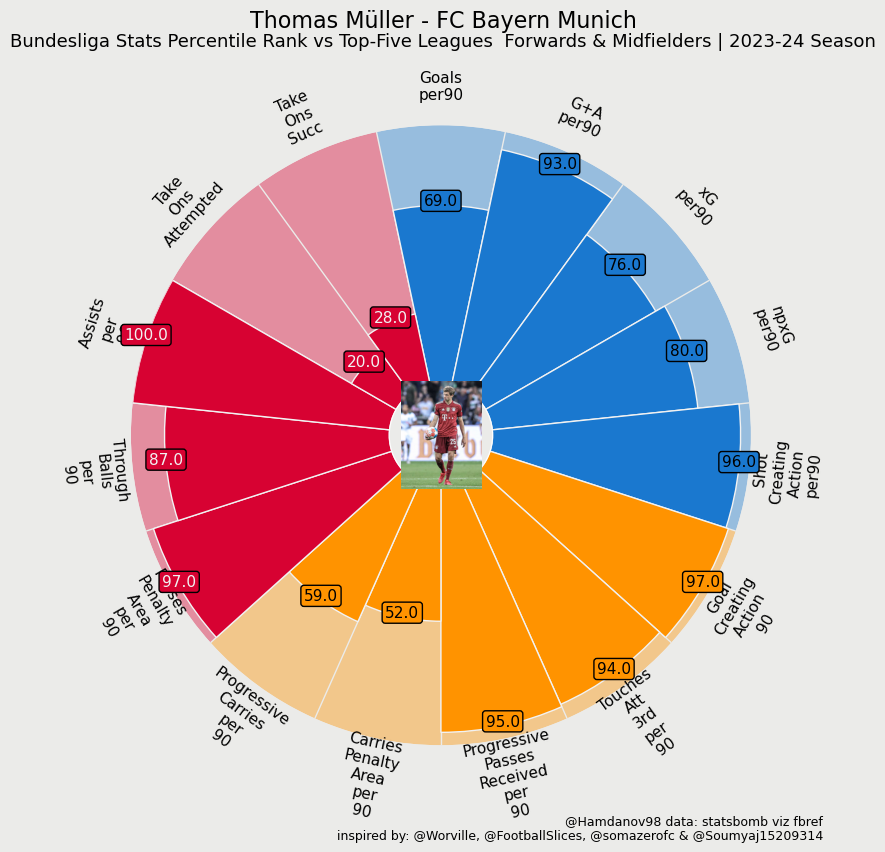

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Thomas Müller - FC Bayern Munich", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues  Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Muller_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [28]:
lookman=player_2024[player_2024['Player']=='Ademola Lookman']
lookman

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
391,1502,Ademola Lookman,ng NGA,"FW,MF",Atalanta,it Serie A,0.0,1997.0,31,22,1894,21.0,0.52,0.86,0.52,0.86,0.43,0.68,0.43,0.68,87.0,39.0,44.8,37.0,42.5,52.81,0.1,2.57,21.81,28.9,6.14,52.81,4.14,1.86,1.76,33.29,202.71,93.9,3.43,2.0,1.67,-3.14,-2.0,41.24,10.57,4.81,0.67,3.1,0.48,0.76,0.19,0.19,0.1,0.43,0.05,0.1,0.05,0.05,0.0,635.0,838.0,75.8,9115.0,2499.0,376.0,441.0,85.3,201.0,247.0,81.4,29.0,74.0,39.2,0.33,0.25,0.23,0.09,2.38,2.19,1.52,0.1,4.62,39.9,36.14,3.76,0.29,0.29,0.19,3.29,0.38,2.48,0.95,0.81,0.0,30.24,0.0,1.33,3.18,1.14,0.16,0.46,0.14,1.9,1.9,46.2,-0.19,-0.0,-0.0,-1.33,1.62,0.57,0.43,0.71,0.05,-0.0,4.24,0.86,-1.0,0.95,0.1,0.52,0.33,0.38,1.05,0.67,0.9,0.0,1.38,0.0,0.05,36.4,0.901398


In [29]:
import pandas as pd




params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[391]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


     Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
391         92.0       96.0      88.0        91.0                        93.0   

     Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
391                     94.0                    92.0   

     Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
391                                96.0                         90.0   

     Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
391                        83.0                        83.0   

     Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
391                  78.0            95.0                86.0           87.0  


In [30]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[92.0,
 96.0,
 88.0,
 91.0,
 93.0,
 94.0,
 92.0,
 96.0,
 90.0,
 83.0,
 83.0,
 78.0,
 95.0,
 86.0,
 87.0]

In [31]:
image_path = "Lookman.jpeg"
fdj_cropped = Image.open(image_path)


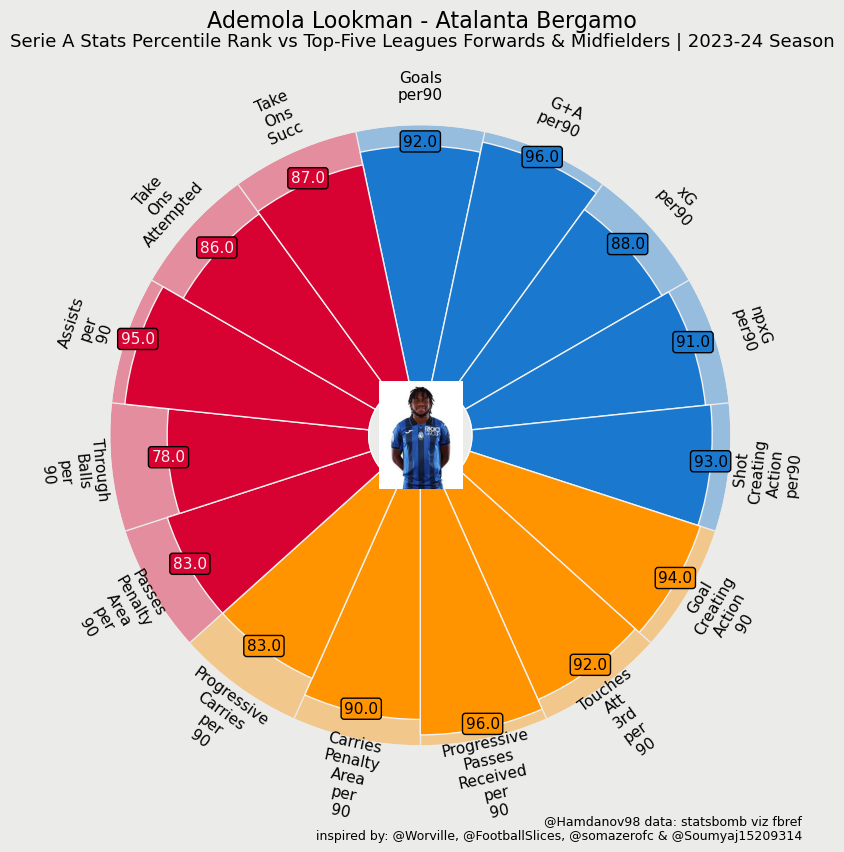

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Ademola Lookman - Atalanta Bergamo", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Lookman_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [33]:
akliouche=player_2024[player_2024['Player']=='Maghnes Akliouche']
akliouche

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
13,55,Maghnes Akliouche,fr FRA,"MF,FW",Monaco,fr Ligue 1,0.0,2002.0,28,18,1613,17.9,0.39,0.61,0.39,0.61,0.3,0.49,0.3,0.49,52.0,27.0,51.9,22.0,42.3,58.94,0.56,5.64,25.53,28.66,4.41,58.94,2.91,1.51,1.23,45.53,257.09,104.25,2.57,2.51,0.78,-2.29,-2.23,42.23,7.54,4.91,0.5,3.3,0.61,0.34,0.17,0.22,0.28,0.39,0.0,0.0,0.0,0.0,0.11,645.0,833.0,77.4,9118.0,2859.0,380.0,444.0,85.6,196.0,246.0,79.7,32.0,69.0,46.4,0.22,0.2,0.19,0.03,2.12,3.58,2.12,0.17,5.2,46.54,43.18,3.02,0.67,0.45,0.11,3.02,0.17,2.07,0.78,0.45,0.0,36.03,0.34,1.34,2.01,1.23,0.19,0.32,0.15,1.6,1.6,17.4,-0.28,-0.0,-0.0,-1.84,1.73,0.06,0.5,1.28,0.0,-0.0,6.15,0.22,-1.06,2.07,0.67,1.12,0.28,0.67,2.01,1.34,1.17,0.0,2.57,0.17,0.0,33.3,0.894429


In [34]:
import pandas as pd




params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[13]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


    Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
13         83.0       86.0      74.0        79.0                        95.0   

    Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
13                     83.0                    91.0   

    Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
13                                79.0                         68.0   

    Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
13                        71.0                        95.0   

    Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
13                  91.0            80.0                67.0           73.0  


In [35]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[83.0,
 86.0,
 74.0,
 79.0,
 95.0,
 83.0,
 91.0,
 79.0,
 68.0,
 71.0,
 95.0,
 91.0,
 80.0,
 67.0,
 73.0]

In [36]:
image_path = "akliouche.jpg"
fdj_cropped = Image.open(image_path)


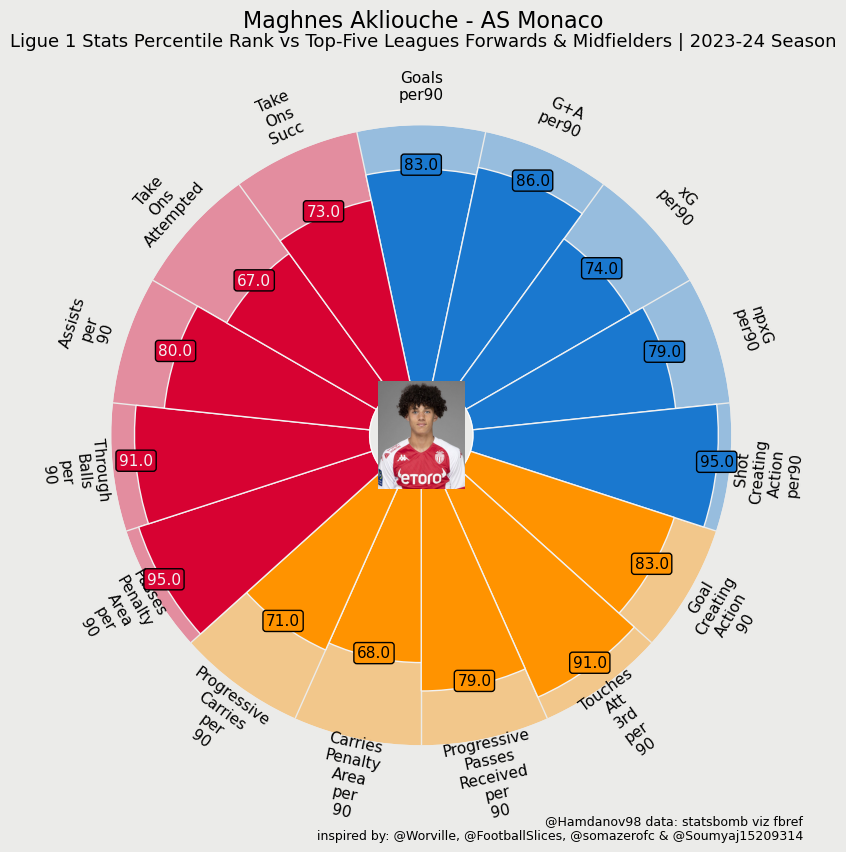

In [37]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Maghnes Akliouche - AS Monaco", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Akliouche_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [38]:
olise=player_2024[player_2024['Player']=='Michael Olise']
olise

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
506,1964,Michael Olise,fr FRA,"FW,MF",Crystal Palace,eng Premier League,0.0,2001.0,19,14,1275,14.2,0.71,1.13,0.64,1.06,0.39,0.8,0.33,0.74,83.0,40.0,48.2,33.0,39.8,67.54,0.7,7.18,27.89,34.01,5.63,67.46,5.85,2.82,2.32,39.65,280.21,155.63,4.79,3.52,1.9,-2.89,-2.32,48.73,9.44,5.79,0.99,3.1,1.06,0.77,0.35,0.49,0.0,0.77,0.07,0.14,0.0,0.0,0.0,540.0,721.0,74.9,8557.0,2634.0,300.0,339.0,88.5,154.0,195.0,79.0,55.0,116.0,47.4,0.42,0.41,0.35,0.01,2.54,3.03,2.39,0.21,5.49,50.77,42.61,7.82,3.1,0.49,0.28,6.83,0.7,2.89,1.76,0.7,0.14,38.03,0.35,1.62,3.95,1.41,0.16,0.45,0.08,4.5,4.3,31.8,-0.0,-0.0,-0.0,-0.92,3.03,0.14,0.77,0.7,0.0,-0.0,4.79,0.49,-1.06,1.34,0.49,0.7,0.14,0.56,1.69,1.13,1.48,0.0,2.11,0.63,0.0,33.3,0.869645


In [39]:
import pandas as pd




params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[506]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


     Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
506         98.0       99.0      85.0        82.0                        98.0   

     Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
506                     99.0                    97.0   

     Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
506                                91.0                         93.0   

     Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
506                        94.0                        97.0   

     Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
506                  94.0            98.0                85.0           88.0  


In [40]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[98.0,
 99.0,
 85.0,
 82.0,
 98.0,
 99.0,
 97.0,
 91.0,
 93.0,
 94.0,
 97.0,
 94.0,
 98.0,
 85.0,
 88.0]

In [41]:
image_path = "olise.jpg"
fdj_cropped = Image.open(image_path)


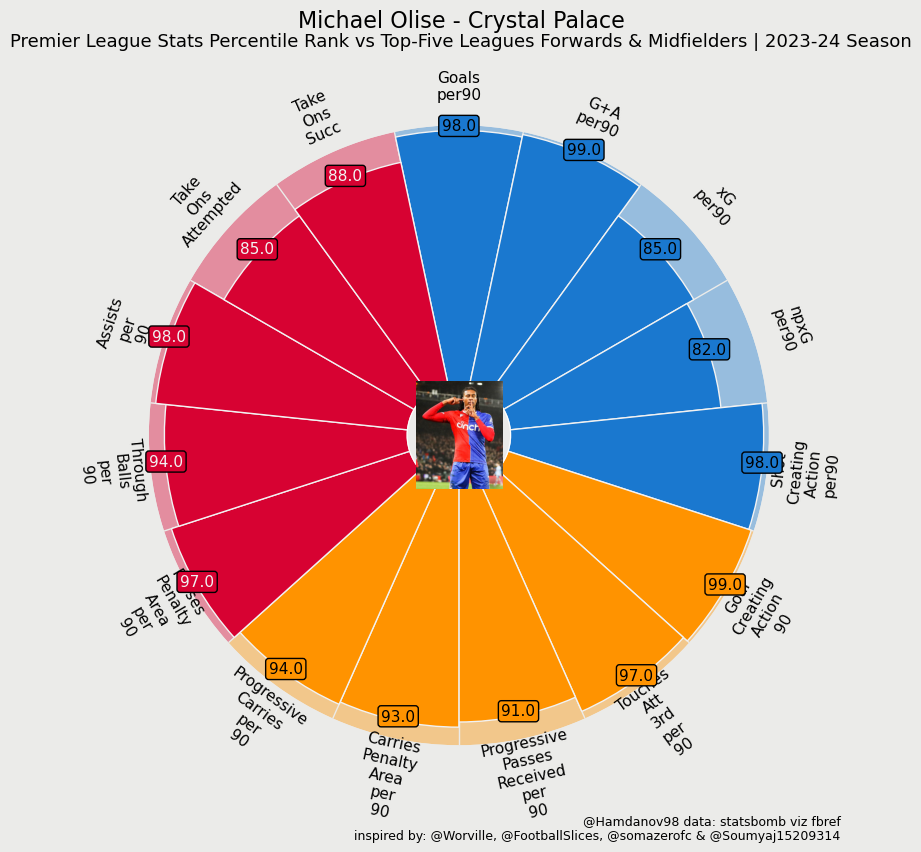

In [42]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Michael Olise - Crystal Palace", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Olise_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [43]:
asensio=player_2024[player_2024['Player']=='Marco Asensio']
asensio

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
38,145,Marco Asensio,es ESP,"MF,FW",Paris S-G,fr Ligue 1,0.0,1996.0,19,13,1113,12.4,0.32,0.73,0.32,0.73,0.26,0.73,0.26,0.73,22.0,10.0,45.5,10.0,45.5,60.24,0.48,5.97,26.05,28.87,3.06,60.24,1.77,0.81,0.81,49.35,279.52,113.95,2.9,2.9,0.48,-1.05,-0.73,47.26,7.42,4.21,0.57,3.06,0.81,0.08,0.08,0.08,0.08,0.4,0.08,0.0,0.08,0.0,0.0,545.0,656.0,83.1,8033.0,2110.0,304.0,334.0,91.0,185.0,208.0,88.9,27.0,68.0,39.7,0.4,0.47,0.35,-0.06,2.66,3.95,1.77,0.4,5.73,52.9,48.23,4.44,0.81,0.48,0.48,4.19,0.65,2.5,0.89,0.81,0.0,43.95,0.24,1.05,2.18,0.81,0.15,0.4,0.12,0.8,0.8,40.0,-0.0,-0.0,-0.0,-0.65,0.81,0.0,0.4,0.81,0.0,-0.0,3.47,0.16,-0.24,0.97,0.32,0.56,0.08,0.32,1.05,0.73,0.56,0.0,1.37,0.16,0.0,30.8,0.854729


In [44]:
import pandas as pd




params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[38]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


    Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
38         76.0       92.0      68.0        73.0                        87.0   

    Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
38                     89.0                    92.0   

    Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
38                                78.0                         52.0   

    Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
38                        78.0                        89.0   

    Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
38                  93.0            98.0                22.0           23.0  


In [45]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[76.0,
 92.0,
 68.0,
 73.0,
 87.0,
 89.0,
 92.0,
 78.0,
 52.0,
 78.0,
 89.0,
 93.0,
 98.0,
 22.0,
 23.0]

In [46]:
image_path = "asensio.jpeg"
fdj_cropped = Image.open(image_path)


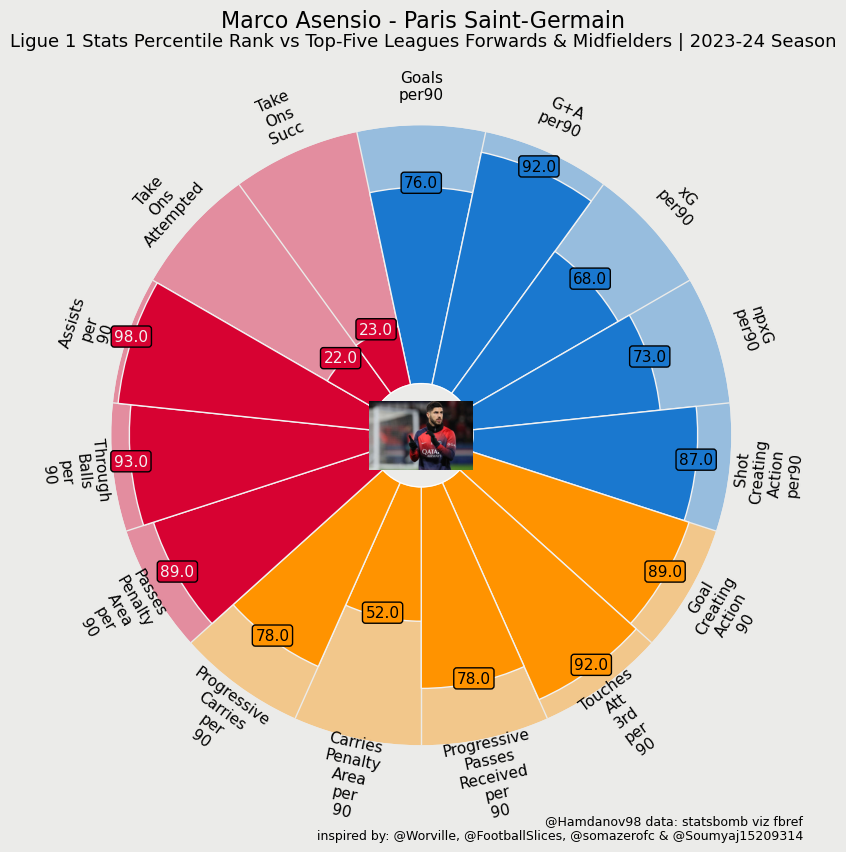

In [47]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Marco Asensio - Paris Saint-Germain", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Asensio_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [48]:
arribas=player_2024[player_2024['Player']=='Sergio Arribas']
arribas

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
36,141,Sergio Arribas,es ESP,"MF,FW",Almería,es La Liga,0.0,2001.0,34,22,2047,22.7,0.4,0.57,0.4,0.57,0.38,0.54,0.38,0.54,49.0,16.0,32.7,31.0,63.3,44.49,0.57,5.2,21.94,18.11,3.44,44.49,2.16,0.7,1.37,24.41,133.96,74.23,2.47,1.72,0.53,-1.76,-0.7,28.55,4.14,4.04,0.4,2.78,0.53,0.13,0.26,0.26,0.09,0.22,0.0,0.04,0.04,0.04,0.04,588.0,751.0,78.3,8318.0,2305.0,355.0,412.0,86.2,168.0,196.0,85.7,32.0,77.0,41.6,0.18,0.16,0.15,0.01,1.85,2.25,1.15,0.18,3.57,33.08,29.12,3.79,1.41,0.18,0.18,2.64,0.31,1.23,0.57,0.4,0.0,25.9,0.18,0.88,2.64,0.97,0.15,0.41,0.15,0.4,0.4,44.2,-0.04,-0.0,-0.0,-0.62,1.85,0.04,0.7,0.75,0.0,-0.0,4.01,0.84,-1.06,1.5,0.7,0.75,0.04,0.62,1.37,0.75,0.88,0.04,2.2,0.35,0.04,45.2,0.853267


In [49]:
import pandas as pd



params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[36]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


    Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
36         84.0       82.0      84.0        88.0                        85.0   

    Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
36                     71.0                    57.0   

    Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
36                                41.0                         55.0   

    Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
36                        69.0                        69.0   

    Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
36                  57.0            72.0                65.0           46.0  


In [50]:
image_path = "arribas.jpg"
fdj_cropped = Image.open(image_path)


In [51]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[84.0,
 82.0,
 84.0,
 88.0,
 85.0,
 71.0,
 57.0,
 41.0,
 55.0,
 69.0,
 69.0,
 57.0,
 72.0,
 65.0,
 46.0]

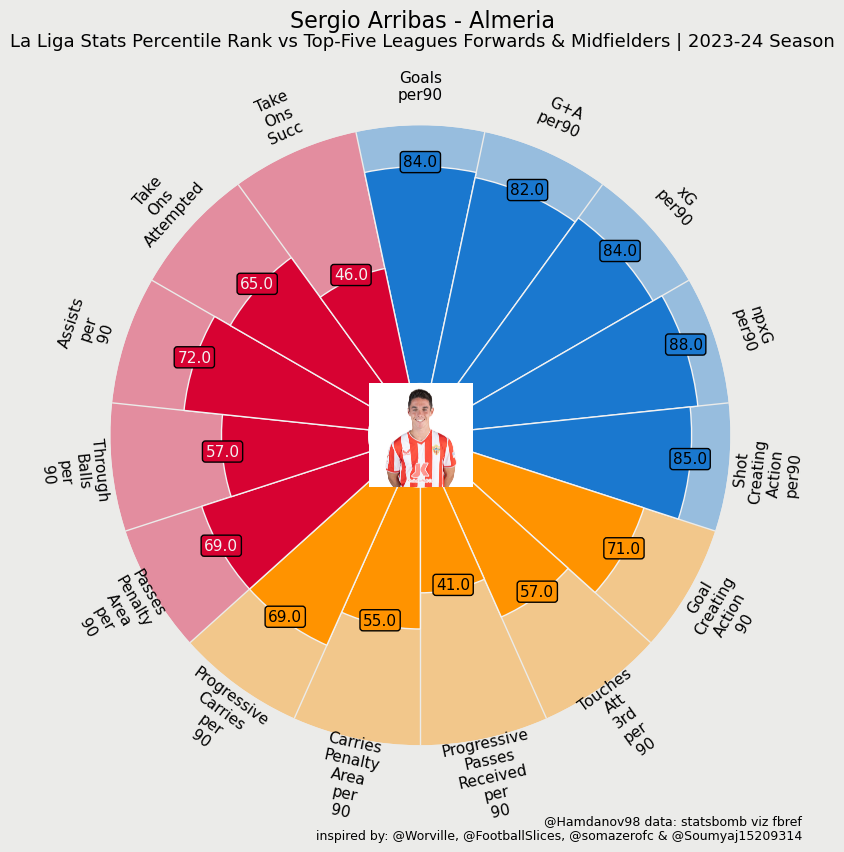

In [52]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Sergio Arribas - Almeria", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Arribas_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [53]:
kramaric=player_2024[player_2024['Player']=='Andrej Kramarić']
kramaric

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
356,1383,Andrej Kramarić,hr CRO,"MF,FW",Hoffenheim,de Bundesliga,0.0,1991.0,30,25,2199,24.4,0.61,0.86,0.41,0.65,0.45,0.75,0.29,0.59,51.0,25.0,49.0,22.0,43.1,55.98,1.19,6.11,24.14,26.23,4.18,55.78,2.09,1.02,0.9,33.28,197.66,99.43,2.91,2.01,0.98,-1.93,-1.11,39.18,7.17,5.53,0.65,3.32,1.6,0.29,0.12,0.16,0.04,0.49,0.04,0.08,0.0,0.04,0.0,904.0,1139.0,79.4,13884.0,3748.0,494.0,558.0,88.5,305.0,373.0,81.8,72.0,132.0,54.5,0.25,0.3,0.29,-0.05,3.2,2.75,0.9,0.12,4.88,46.68,39.8,6.72,1.8,0.37,0.16,4.63,0.86,2.99,1.11,1.11,0.04,37.05,0.16,1.23,2.62,1.19,0.16,0.34,0.11,3.9,2.9,40.9,-0.16,-0.0,-0.0,-0.33,1.43,0.33,0.41,0.08,0.04,-0.0,4.63,0.37,-0.53,0.45,0.2,0.16,0.08,0.25,0.53,0.29,0.57,0.08,0.86,0.49,0.08,46.2,0.917257


In [54]:
import pandas as pd



params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[356]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


     Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
356         95.0       96.0      90.0        77.0                        97.0   

     Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
356                     93.0                    87.0   

     Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
356                                76.0                         76.0   

     Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
356                        78.0                        52.0   

     Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
356                  86.0            86.0                66.0           69.0  


In [55]:
image_path = "Kramaric.jpeg"
fdj_cropped = Image.open(image_path)


In [61]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[94.0,
 98.0,
 93.0,
 67.0,
 90.0,
 98.0,
 91.0,
 80.0,
 85.0,
 85.0,
 88.0,
 81.0,
 98.0,
 83.0,
 74.0]

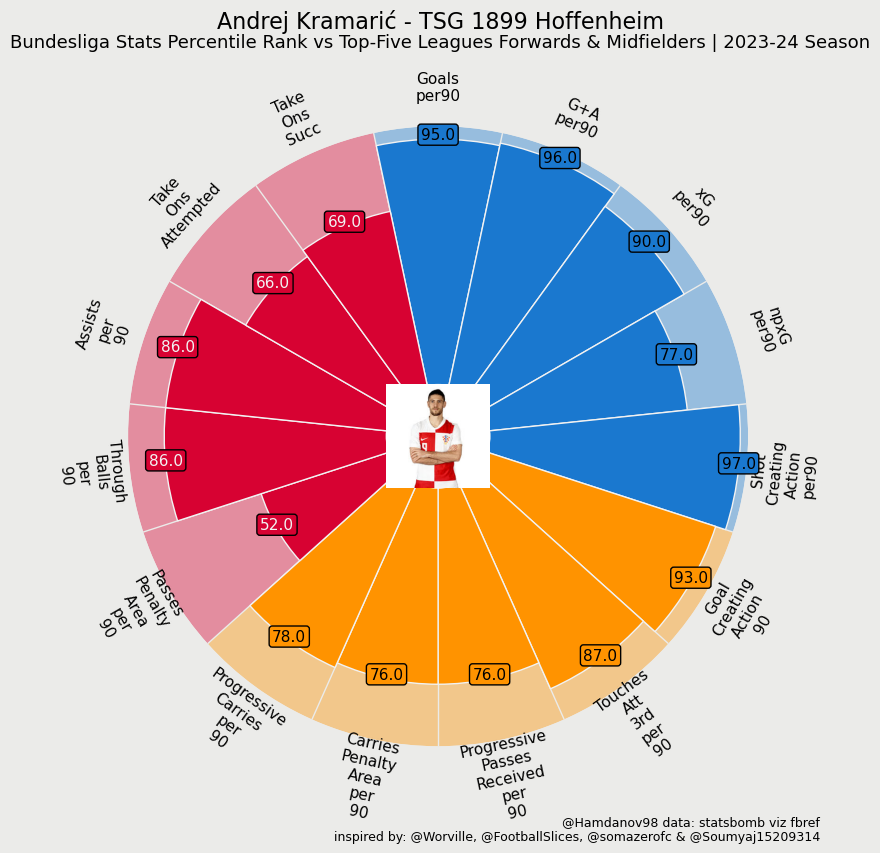

In [57]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Andrej Kramarić - TSG 1899 Hoffenheim", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Kramaric_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()


In [58]:
dybala=player_2024[player_2024['Player']=='Paulo Dybala']
dybala

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_alvarez_2024
192,787,Paulo Dybala,ar ARG,"FW,MF",Roma,it Serie A,0.0,1993.0,28,25,1959,21.8,0.6,1.01,0.28,0.69,0.49,0.68,0.23,0.43,77.0,28.0,36.4,43.0,55.8,58.58,0.37,3.99,27.06,28.07,4.04,58.26,3.53,1.28,1.97,37.06,232.94,105.32,3.62,2.8,1.42,-3.21,-1.88,45.55,7.66,4.36,0.87,2.57,1.15,0.14,0.18,0.28,0.05,0.55,0.18,0.09,0.0,0.05,0.0,790.0,1000.0,79.0,12944.0,3000.0,409.0,461.0,88.7,272.0,330.0,82.4,80.0,140.0,57.1,0.41,0.2,0.18,0.22,2.29,3.07,1.7,0.0,5.6,45.87,40.23,5.37,1.24,0.32,0.5,4.04,0.46,2.48,1.01,1.24,0.0,36.24,0.28,0.92,2.39,0.74,0.12,0.38,0.1,2.4,0.9,25.0,-0.14,-0.0,-0.0,-0.55,2.29,0.23,0.14,0.6,0.0,-0.0,3.81,0.32,-0.96,1.01,0.14,0.46,0.41,0.09,0.83,0.73,0.55,0.0,1.15,0.28,0.05,11.1,0.869361


In [59]:
import pandas as pd



params = [
    'Goals_per90',
    'G+A_per90',
    'xG_per90',
    'npxG_per90',
    'Shot_Creating_Action_per90',
    'Goal_Creating_Action_90',
    'Touches_Att_3rd_per_90',
    'Progressive_Passes_Received_per_90',
    'Carries_Penalty_Area_per_90',
    'Progressive_Carries_per_90',
    'Passes_Penalty_Area_per_90',
    'Through_Balls_per_90',
    'Assists_per_90',
    'Take_Ons_Attempted',
    'Take_Ons_Succ'
]




# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
mbappe_percentile_ranks = round(players_percentile_ranks.iloc[[192]],0)

# Print the percentile ranks for Harry Kane
print(mbappe_percentile_ranks)


     Goals_per90  G+A_per90  xG_per90  npxG_per90  Shot_Creating_Action_per90  \
192         94.0       98.0      93.0        67.0                        90.0   

     Goal_Creating_Action_90  Touches_Att_3rd_per_90  \
192                     98.0                    91.0   

     Progressive_Passes_Received_per_90  Carries_Penalty_Area_per_90  \
192                                80.0                         85.0   

     Progressive_Carries_per_90  Passes_Penalty_Area_per_90  \
192                        85.0                        88.0   

     Through_Balls_per_90  Assists_per_90  Take_Ons_Attempted  Take_Ons_Succ  
192                  81.0            98.0                83.0           74.0  


In [60]:
image_path = "dybala.jpeg"
fdj_cropped = Image.open(image_path)


In [62]:
mbappe_percentile_ranks_list = mbappe_percentile_ranks.values.flatten().tolist()

mbappe_percentile_ranks_list

[94.0,
 98.0,
 93.0,
 67.0,
 90.0,
 98.0,
 91.0,
 80.0,
 85.0,
 85.0,
 88.0,
 81.0,
 98.0,
 83.0,
 74.0]

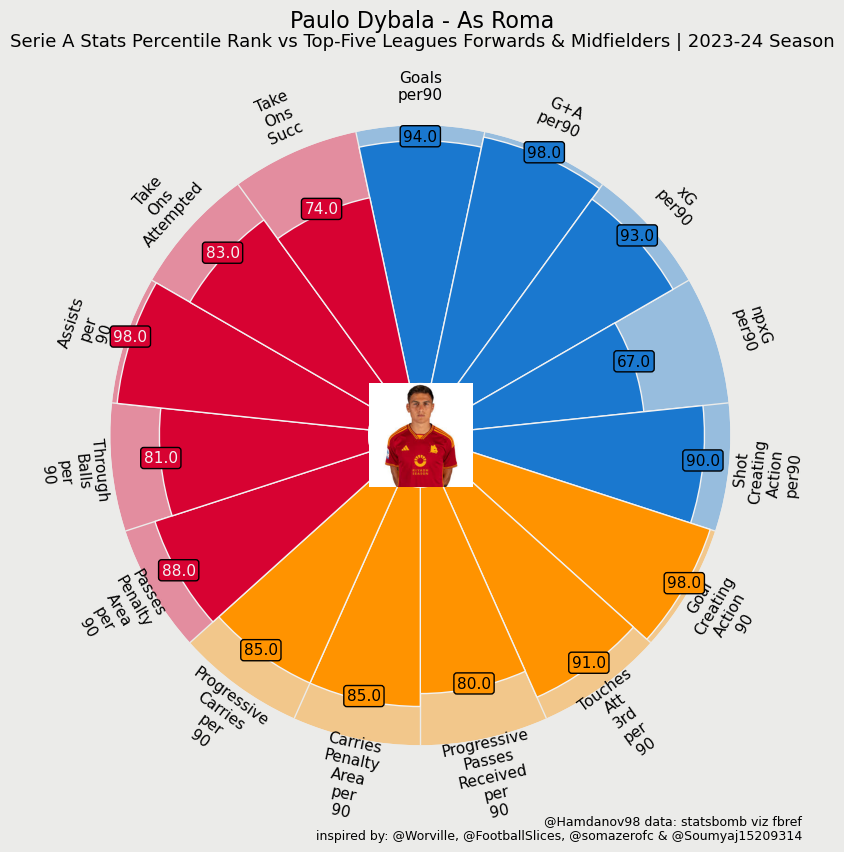

In [63]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    mbappe_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Paulo Dybala - As Roma", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues Forwards & Midfielders | 2023-24 Season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
# Save the figure with proper facecolor and edgecolor
plt.savefig('Dybala_Percentile.png', dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

plt.show()
